In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams


In [3]:
#Importing data
data_raw = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\Dow Jones Index.csv")

In [4]:
#printing data
data_raw.describe(include='all')

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,750,750,750,750,750,750,7.500000e+02,750.000000,720.000000,7.200000e+02,750,750,750.000000,750.000000,750.000000
unique,NaN,30,25,722,713,711,711,NaN,NaN,NaN,NaN,720,715,NaN,NaN,NaN
top,NaN,HD,4/29/2011,$37.26,$75.75,$16.97,$36.00,NaN,NaN,NaN,NaN,$37.26,$36.00,NaN,NaN,NaN
freq,NaN,25,30,3,2,3,3,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
mean,1.520000,NaN,NaN,NaN,NaN,NaN,NaN,1.175478e+08,0.050262,5.593627,1.173876e+08,NaN,NaN,0.238468,52.525333,0.691826
std,0.499933,NaN,NaN,NaN,NaN,NaN,NaN,1.584381e+08,2.517809,40.543478,1.592322e+08,NaN,NaN,2.679538,46.335098,0.305482
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.718851e+06,-15.422900,-61.433175,9.718851e+06,NaN,NaN,-15.422900,0.000000,0.065574
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.086624e+07,-1.288053,-19.804284,3.067832e+07,NaN,NaN,-1.222067,24.000000,0.534549
50%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.306088e+07,0.000000,0.512586,5.294556e+07,NaN,NaN,0.101193,47.000000,0.681067
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.327218e+08,1.650888,21.800622,1.333230e+08,NaN,NaN,1.845562,69.000000,0.854291


In [5]:
data_raw.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [6]:
data_raw.percent_change_volume_over_last_wk = data_raw.percent_change_volume_over_last_wk.fillna(data_raw.percent_change_volume_over_last_wk.mean())
data_raw.previous_weeks_volume = data_raw.previous_weeks_volume.fillna(data_raw.previous_weeks_volume.mean())
data_raw.head()
# data_raw.columns[3:7]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,5.593627,1.173876e+08,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,2.396556e+08,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,2.429634e+08,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,1.384285e+08,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,1.513792e+08,$17.33,$17.37,0.230814,97,0.175029


In [7]:
data_raw[data_raw.columns[3:7]] = data_raw[data_raw.columns[3:7]].replace('[\$,]', '', regex=True).astype(float)
data_raw[data_raw.columns[11:13]] = data_raw[data_raw.columns[11:13]].replace('[\$,]', '', regex=True).astype(float)

In [8]:
data_raw.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,5.593627,1.173876e+08,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_raw['stock']= label_encoder.fit_transform(data_raw['stock'])

In [10]:
data_raw=data_raw.drop(columns='date')

In [11]:
#importing Kmeans clustering algorithm

from sklearn.cluster import KMeans

data_raw_kmeans = KMeans(n_clusters=3)
data_raw_kmeans.fit(data_raw)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
data_raw.shape

(750, 15)

In [13]:
data_raw_kmeans.cluster_centers_

array([[ 1.52331606e+00,  1.51934370e+01,  6.32010190e+01,
         6.43710190e+01,  6.20338342e+01,  6.33172539e+01,
         5.22429329e+07,  1.62222871e-01,  5.24442272e+00,
         5.45583475e+07,  6.32813990e+01,  6.35319862e+01,
         3.58626885e-01,  5.42936097e+01,  7.16940575e-01],
       [ 1.50000000e+00,  3.50000000e+00,  1.40485714e+01,
         1.43400000e+01,  1.35457143e+01,  1.38246429e+01,
         7.13553198e+08, -1.38552930e+00,  9.80640764e+00,
         6.89019437e+08,  1.38128571e+01,  1.37153571e+01,
        -7.53959086e-01,  4.77142857e+01,  1.24315414e-01],
       [ 1.51048951e+00,  1.38461538e+01,  2.27421678e+01,
         2.32877622e+01,  2.22604895e+01,  2.27214685e+01,
         2.65263660e+08, -1.21925975e-01,  6.18265552e+00,
         2.59852491e+08,  2.27282517e+01,  2.27116084e+01,
        -5.37275133e-02,  4.63076923e+01,  7.01257091e-01]])

In [14]:
#Calculating the sum square error or SSE -- the output is negative as python considers it as error but it is actually distance 
sse=data_raw_kmeans.fit(data_raw).score(data_raw)
print(sse)

-7.158945518637695e+18


In [15]:
SSE = np.absolute(sse)
print(SSE)

7.158945518637695e+18


In [16]:
data_raw_clustered = pd.concat([data_raw,pd.Series(data_raw_kmeans.labels_)],axis=1)

In [17]:
data_raw_clustered.rename(columns={data_raw_clustered.columns[-1]:'Cluster_number'},inplace=True)

In [18]:
data_raw_clustered.describe(include='all')

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,Cluster_number
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.520000,14.500000,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,5.593627,1.173876e+08,53.702440,53.889080,0.238468,52.525333,0.691826,0.418667
std,0.499933,8.661218,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,39.723229,1.560107e+08,32.778111,33.016677,2.679538,46.335098,0.305482,0.790919
min,1.000000,0.000000,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574,0.000000
25%,1.000000,7.000000,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-18.890959,3.127265e+07,30.315000,30.462500,-1.222067,24.000000,0.534549,0.000000
50%,2.000000,14.500000,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,1.801868,5.512882e+07,46.015000,46.125000,0.101193,47.000000,0.681067,0.000000
75%,2.000000,22.000000,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,19.984489,1.296170e+08,72.715000,72.915000,1.845562,69.000000,0.854291,0.000000
max,2.000000,29.000000,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,336.000000,1.564210,2.000000


In [19]:
data_raw_clustered.sort_values(['Cluster_number'])

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,Cluster_number
374,2,1,45.61,46.49,45.10,46.28,31114741,1.468980,8.267781,2.873869e+07,46.36,46.25,-0.237274,82,0.388937,0
466,2,8,41.76,42.02,40.84,41.52,40820710,-0.574713,4.520395,3.905526e+07,40.97,42.27,3.173050,238,0.963391,0
467,2,8,40.97,42.46,40.45,42.27,24312043,3.173050,-40.441891,4.082071e+07,42.34,43.10,1.794990,232,0.946298,0
468,2,8,42.34,43.35,41.71,43.10,30122091,1.794990,23.897819,2.431204e+07,43.47,43.06,-0.943179,224,0.928074,0
469,2,8,43.47,43.79,42.30,43.06,35369886,-0.943179,17.421749,3.012209e+07,43.32,41.52,-4.155120,217,0.928936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,13,21.75,22.08,21.35,21.56,291751623,-0.873563,13.905065,2.561358e+08,21.69,20.87,-3.780540,61,0.834879,2
163,1,13,21.95,22.19,21.01,21.86,256135777,-0.410023,27.315745,2.011815e+08,21.75,21.56,-0.873563,68,0.823422,2
162,1,13,21.63,22.14,21.28,22.14,201181541,2.357840,-15.056774,2.368424e+08,21.95,21.86,-0.410023,75,0.813008,2
535,2,13,23.13,23.83,22.65,23.41,344755154,1.210550,-32.912790,5.138910e+08,23.32,23.22,-0.428816,82,0.897053,2


In [20]:
silhoute_score = silhouette_score(data_raw, data_raw_kmeans.labels_)

In [21]:
print(silhoute_score)

0.7119593821024359


In [22]:
#K means per value of K
k_means_per_k = [KMeans(n_clusters=k,random_state=40).fit(data_raw) for k in range(1,10)]

silhoute_scores_per_k = [silhouette_score(data_raw,model.labels_) for model in k_means_per_k[1:]]

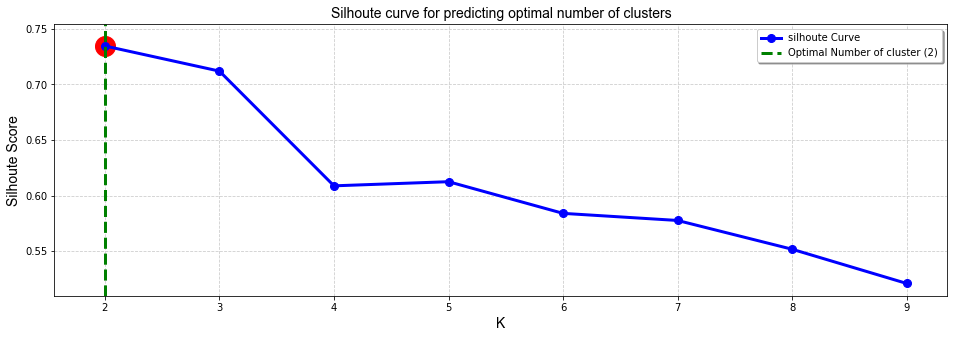

In [23]:
#ploting graph for silhoute_scores

rcParams['figure.figsize']=16,5

_ = plt.plot(range(2,10),silhoute_scores_per_k,'bo-',color='blue',linewidth=3,markersize=8,label='silhoute Curve')

_ = plt.xlabel('K',fontsize=14,family='Arial')

_ = plt.ylabel('Silhoute Score',fontsize=14,family='Arial')

_ = plt.grid(which='major',color='#cccccc',linestyle='--')

_ = plt.title('Silhoute curve for predicting optimal number of clusters', family='Arial',fontsize=14)

#optimal number of k
k  = np.argmax(silhoute_scores_per_k)+2

#line to mark optimal number of k in curve
_ = plt.axvline(x=k, linestyle='--', c='green',linewidth=3,label='Optimal Number of cluster ({})'.format(k))

_ = plt.scatter(k, silhoute_scores_per_k[k-2],c='red',s=400)

_ = plt.legend(shadow=True)

_ = plt.show()